In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, cross_validation, metrics

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# label

In [2]:
labels = {'0':'file', '1':'network', '2':'service', '3':'database', '4':'communication', '5':'memory', '6':'driver', 
    '7':'system', '8':'application', '9':'io', '10':'others', '11':'security', '12':'disk', '13':'processor'}

fault_label = {'0':'file', '1':'network', '2':'service', '3':'database','5':'memory', 
               '10':'others', '11':'security', '12':'disk', '13':'processor'}

# load data

In [3]:
train_X, test_X = [],[]
train_y, test_y = [],[]

print("loading data...")

try:
    with open("data_msg_type/semantic_train_x.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            train_X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/semantic_train_y.txt", 'rU') as f:
        res = list(f)
        for line in res:
            train_y.append(int(line.strip("\n")[0]))         
except:
    print("Error in reading the train set file.")
    exit()
    
try:
    with open("data_msg_type/semantic_test_x.txt", 'rU') as f:
        res = list(f)
        for line in res:
            line.strip("\n")
            features = line.split("\t")
            while features.__contains__(""):
                features.remove("")
            for i in range(len(features)):
                features[i] = float(features[i])
            test_X.append(features)
         
    #read the classes from file and put them in list.      
    with open("data_msg_type/semantic_test_y.txt", 'rU') as f:
        res = list(f)
        for line in res:
            test_y.append(int(line.strip("\n")[0]))         
except:
    print("Error in reading the train set file.")
    exit()

print("Dataset loaded.")

loading data...
Dataset loaded.


# convert data

In [4]:
X_train = np.array(train_X) #change to matrix
y_train = np.array(train_y) #change to matrix
X_test = np.array(test_X) #change to matrix
y_test = np.array(test_y) #change to matrix

# svm-linear train

In [5]:
print("-------------------------- SVM, Kernel = Linear --------------------------")
#C_linear = [0.1, 3, 10, 100...]
C_linear = [1]
result_linear = []

print("C value chosen from: ", C_linear)
print("Calculating accuracy with K-fold...")

for C in C_linear:
    svc_linear = svm.SVC(kernel='linear', C=C)
    scores = cross_validation.cross_val_score(
        svc_linear, X_train, y_train, scoring='accuracy', cv=14)
    result_linear.append(scores.mean())

print("result:", result_linear)

-------------------------- SVM, Kernel = Linear --------------------------
('C value chosen from: ', [1])
Calculating accuracy with K-fold...


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=14.
  % (min_labels, self.n_folds)), Warning)


('result:', [0.93179814226891422])


# svm-linear test and predict

In [6]:
# Result with different C are equal, so here choose C=1 directly as the best parameter.
best_param_linear = {"C": 1}
linear_test = svm.SVC(kernel='linear', C=best_param_linear.get("C")).fit(X_train, y_train)
linear_test_score = linear_test.score(X_test, y_test)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_test)):
    count2 += 1
    classinrow = X_test[i]
    classinrow = np.array(X_test[i]).reshape(1,-1)
    predicted = linear_test.predict(classinrow)#predict class.
    actual = y_test[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1

print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)
print("Linear Kernel test score: ", linear_test_score)

('Total cases: ', 20000)
('Correct Prediction: ', 18849)
('Correct prediction rate: ', 0.94245)
('Linear Kernel test score: ', 0.94245000000000001)


# svm-linear plot

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

    network       0.75      0.16      0.26       473
       file       0.55      0.92      0.69       911
   database       1.00      1.00      1.00       213
    service       0.00      0.00      0.00         2
     memory       0.88      0.96      0.92      2891
     others       0.87      0.74      0.80       348
   security       1.00      1.00      1.00     14495
       disk       0.80      0.12      0.21       535
  processor       0.90      1.00      0.95       132

avg / total       0.95      0.94      0.93     20000

[[   76    89     0     0   283    14     0     0    11]
 [   14   842     0     0    33    20     0     0     2]
 [    0     0   213     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0]
 [    0   114     0     0  2777     0     0     0     0]
 [    1    75     0     0     2   257     0    13     0]
 [    1     3     0     0     0     0 14486     4     1]
 [    9   398  

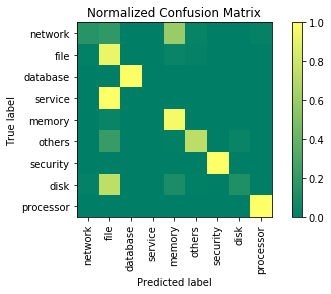

In [7]:
# cmap can be changed to many colors, (colormaps.Oranges,OrRd, etc)
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.summer):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
print(metrics.classification_report(
    actualist, predlist, target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)

precision: 0.9479
recall: 0.9425
f1-score: 0.9318

# svm-rbf train

In [8]:
print("-------------------------- SVM, Kernel = RBF --------------------------")
#C_rbf = [0.1, 3, 10, 100...]
C_rbf = [1]
result_rbf = []

print("C value chosen from: ", C_rbf)
print("Calculating accuracy with K-fold...")

for C in C_rbf:
    svc_rbf = svm.SVC(kernel='rbf', C=C)
    scores = cross_validation.cross_val_score(
        svc_rbf, X_train, y_train, scoring='accuracy', cv=14)
    result_rbf.append(scores.mean())

print("result:", result_rbf)

-------------------------- SVM, Kernel = RBF --------------------------
('C value chosen from: ', [1])
Calculating accuracy with K-fold...
('result:', [0.82204807608469321])


# svm-rbf test and predict

In [9]:
# Result with different C are equal, so here choose C=1 directly as the best parameter.
best_param_rbf = {"C": 1}
rbf_test = svm.SVC(kernel='rbf', C=best_param_rbf.get("C")).fit(X_train, y_train)
rbf_test_score = rbf_test.score(X_test, y_test)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_test)):
    count2 += 1
    classinrow = X_test[i]
    classinrow = np.array(X_test[i]).reshape(1,-1)
    predicted = rbf_test.predict(classinrow)#predict class.
    actual = y_test[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1

print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)
print("RBF Kernel test score: ", rbf_test_score)

('Total cases: ', 20000)
('Correct Prediction: ', 17879)
('Correct prediction rate: ', 0.89395)
('RBF Kernel test score: ', 0.89395000000000002)


# svm-rbf plot

             precision    recall  f1-score   support

    network       0.21      0.02      0.04       473
       file       0.60      0.40      0.48       911
   database       1.00      1.00      1.00       213
    service       0.00      0.00      0.00         2
     memory       0.84      0.95      0.89      2891
     others       0.08      0.19      0.12       348
   security       0.96      1.00      0.98     14495
       disk       0.00      0.00      0.00       535
  processor       0.00      0.00      0.00       132

avg / total       0.86      0.89      0.87     20000

[[   10   103     0     0   291    23    46     0     0]
 [   17   366     0     0    33   325   170     0     0]
 [    0     0   213     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0     0     0]
 [    1   105     0     0  2737    10    38     0     0]
 [    0    13     0     0     2    67   266     0     0]
 [    2     0     0     0     0     7 14486     0     0]
 [   18    23  

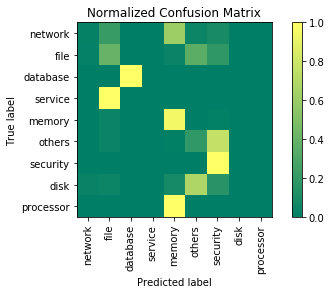

In [10]:
# cmap can be changed to many colors, (colormaps.Oranges,OrRd, etc)
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.summer):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
print(metrics.classification_report(
    actualist, predlist, target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)

precision: 0.8615
recall: 0.8947
f1-score: 0.8745

# svm-poly train

In [11]:
print("-------------------------- SVM, Kernel = Poly --------------------------")
#C_poly = [0.1, 3, 10, 100...]
C_poly = [1]
result_poly = []

print("C value chosen from: ", C_poly)
print("Calculating accuracy with K-fold...")

for C in C_poly:
    svc_poly = svm.SVC(kernel='poly', C=C)
    scores = cross_validation.cross_val_score(
        svc_poly, X_train, y_train, scoring='accuracy', cv=14)
    result_poly.append(scores.mean())

print("result:", result_poly)

-------------------------- SVM, Kernel = Poly --------------------------
('C value chosen from: ', [1])
Calculating accuracy with K-fold...
('result:', [0.62453585537755274])


# svm-poly test and predict

In [12]:
# Result with different C are equal, so here choose C=1 directly as the best parameter.
best_param_poly = {"C": 1}
poly_test = svm.SVC(kernel='poly', C=best_param_poly.get("C"), 
                    #degree=best_param_poly.get("degree")
                   ).fit(X_train, y_train)
poly_test_score = poly_test.score(X_test, y_test)

count1 = 0
count2 = 0
actualist = []
predlist = []

for i in range(len(X_test)):
    count2 += 1
    classinrow = X_test[i]
    classinrow = np.array(X_test[i]).reshape(1,-1)
    predicted = poly_test.predict(classinrow)#predict class.
    actual = y_test[i]
    actualist.append(actual)
    predlist.append(predicted[0])
    if predicted == actual:
        count1 += 1

print("Total cases: ", count2)
print("Correct Prediction: ", count1)
print("Correct prediction rate: ", float(count1) / count2)
print("Poly Kernel test score: ", poly_test_score)

('Total cases: ', 20000)
('Correct Prediction: ', 14732)
('Correct prediction rate: ', 0.7366)
('Poly Kernel test score: ', 0.73660000000000003)


# svm-poly plot

             precision    recall  f1-score   support

    network       0.00      0.00      0.00       473
       file       0.88      0.27      0.41       911
   database       0.00      0.00      0.00       213
    service       0.00      0.00      0.00         2
     memory       0.00      0.00      0.00      2891
     others       0.00      0.00      0.00       348
   security       0.73      1.00      0.85     14495
       disk       0.00      0.00      0.00       535
  processor       0.00      0.00      0.00       132

avg / total       0.57      0.74      0.63     20000

[[    0    10     0     0     0     1   462     0     0]
 [    0   244     0     0     0     0   667     0     0]
 [    0     0     0     0     0     0   213     0     0]
 [    0     0     0     0     0     0     2     0     0]
 [    0     0     0     0     0     0  2891     0     0]
 [    0    14     0     0     0     0   334     0     0]
 [    0     7     0     0     0     0 14488     0     0]
 [    0     1  

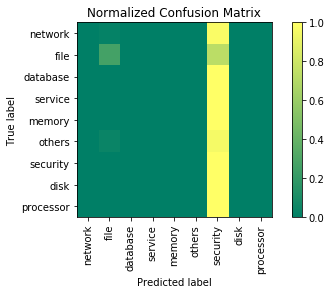

In [13]:
# cmap can be changed to many colors, (colormaps.Oranges,OrRd, etc)
def plot_CM(cm, title="Normalized Confusion Matrix", cmap=plt.cm.summer):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(fault_label))
    plt.xticks(tick_marks, fault_label.values(), rotation=90)
    plt.yticks(tick_marks, fault_label.values())
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
print(metrics.classification_report(
    actualist, predlist, target_names = list(fault_label.values())))
cm = metrics.confusion_matrix(actualist, predlist)
print(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_CM(cm_normalized)

precision: 0.5692
recall: 0.7370
f1-score: 0.6347